#### GOAL:
Create a web scraper with python and cleanse the data to create a CSV file that is ready to be uploaded to a BigQuery table
#### APPROACH:
Language : Python <br>
Problem Framing and understanding the Goal <br>
Data Set: Scraped the data from Wikipedia (List of United States cities by population, Each city wikipedia page)<br>
Data Scraping, Data Cleaning and Preprocessing<br>
#### Data Scraped from:
- https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population<br>
- Inside the links of each and every city
    

In [153]:
# Imprting Libraries

from bs4 import BeautifulSoup
import pandas as pd
import re
import requests
from IPython.display import Image

#### Scraping data from https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
- Table data has been scraped from the link (image below)
- Creating 'table_city' to store information about each city

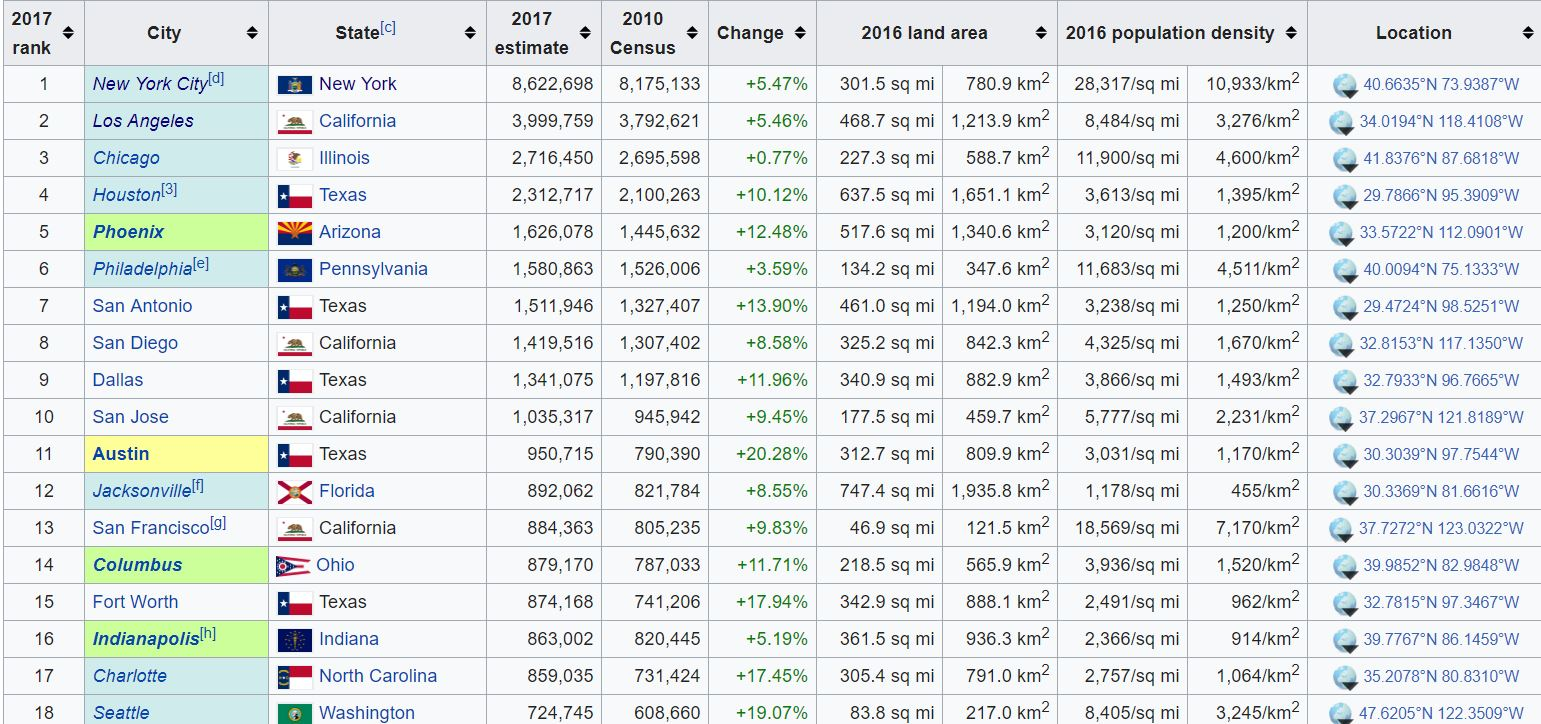

In [154]:
Image(filename='.\TOPOS\Pictures\Pics_sample_table.jpg', width = 800, height=200)

In [155]:
# calling the URL to get the HTML Format
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data, 'lxml')

state_name = soup.find('div',class_ ='wikitable sortable jquery-tablesorter')
table = soup.findChildren('table')[4]
rows = table.find_all('tr')

all_cols = []
all_links = []

#Iterating over each row
for row in rows:
    cols=row.find_all('td')
    link_can = row.find('a',href = True)
    all_links.append('https://en.wikipedia.org'  + link_can['href'])    
    cols=[x.text.strip() for x in cols]
    all_cols.append(cols)
#print(len(all_links))
table_city = pd.DataFrame(all_cols, columns=['Rank', 'city','state','2017_estimate','2018_census','change','2016_land_area_miles','2016_land_area_km','2016_population_density_miles','2016_population_density_km','Location'])
table_city['link'] = all_links   
table_city.drop(table_city.index[[0]], inplace = True)

In [156]:
table_city.head(3)

,Rank,city,state,2017_estimate,2018_census,change,2016_land_area_miles,2016_land_area_km,2016_population_density_miles,2016_population_density_km,Location,link
1,1,New York City[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...,https://en.wikipedia.org/wiki/New_York_City
2,2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...,https://en.wikipedia.org/wiki/Los_Angeles
3,3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...,https://en.wikipedia.org/wiki/Chicago


In [157]:
table_city.reset_index(drop = False, inplace=True)
table_city.drop(columns = 'index',inplace=True)

#### Scraping data for each city link
for eg: 
- Consider New York City Link: https://en.wikipedia.org/wiki/New_York_City
- Data Extracted is : About the city and its related information as depicted in picture below
- Creating 'DataFrame_city' to store information about each city


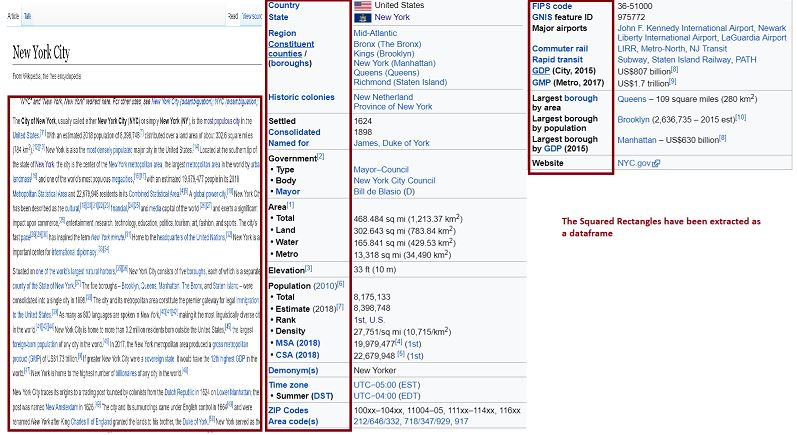

In [158]:
Image(filename='.\TOPOS\Pictures\Pics_sample.jpg', width = 800, height=200)

In [159]:
links = table_city['link'].tolist()
# defining list
mayor_name = []
time_zone = []
time_zone_summer = []
major_airport = []
city_cols_list = []
gdp = []
gmp = []
website = []
x = []
table_list_city_final = []
table_list_header_final = []

# Iterating over each city link
for link in links[:]:
    url = link
    response = requests.get(url)
    data = response.text
    soup = BeautifulSoup(data, 'lxml')
    city_table_data = soup.find('div',class_ ='infobox geography vcard')
    table = soup.findChildren('table')[0]
    rows = table.find_all('tr',class_ ='mergedrow')
    table_list_city = []
    table_list__header = []
    a = []
    b = []
    
    col_list_new = []
    for row in rows:
        #print(row)
        col_list_new = []
        city_cols=row.find_all('th')
        #print(city_cols)
        city_cols_1=[x.text.strip() for x in city_cols]
       
        #print(city_cols_1)
        for i in city_cols_1:
            i = i.replace('•\xa0','')
            i = re.sub(r'\[.*?\]', '', i)
            col_list_new.append(i)
        #print(col_list_new)
        city_cols=row.find_all('td')
        city_cols_2=[x.text.strip() for x in city_cols]
        #print(city_cols_2)
        #merge = list(zip(city_cols_1,city_cols_2))
        #print(merge)
        #a = [[f'{a}:{b}' for a,b in zip(*z)] for z in zip(city_cols_1,city_cols_2)]
        #table_list_city.append(merge)
        a.append(col_list_new)
        b.append(city_cols_2)
    
    lower_case_a = [[string.lower() for string in sublist] for sublist in a]
    lower_case_b = [[string.lower() for string in sublist] for sublist in b]
    
    #b.lower()
    mydicts = [dict(zip(*z)) for z in zip(lower_case_a, lower_case_b)]
    result = {}
    for d in mydicts:
        result.update(d)
    x.append(result)
    
DataFrame_city= pd.DataFrame(x)

In [160]:
DataFrame_city.head(2)

,,a city,acting mayor and vice mayor,administrator,airport,airports,alaska house,alaska senate,aldermen,area code,...,urban (2010),urban density,usda hardiness zones,vice mayor,vice-mayor,virginia senate,water,waterways,white,wikimedia commons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,165.841 sq mi (429.53 km2),NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.02 sq mi (88.12 km2) 6.7%,NaN,NaN,NaN


In [161]:
DataFrame_city.columns

Index(['', 'a city', 'acting mayor and vice mayor', 'administrator', 'airport',
       'airports', 'alaska house', 'alaska senate', 'aldermen', 'area code',
       ...
       'urban (2010)', 'urban density', 'usda hardiness zones', 'vice mayor',
       'vice-mayor', 'virginia senate', 'water', 'waterways', 'white',
       'wikimedia commons'],
      dtype='object', length=281)

In [344]:
# Concatenating both the dataframes: [table_city, DataFrame_city] into 'result_df'

result_df = pd.concat([table_city, DataFrame_city], axis=1)

In [345]:
column_name_list = list(result_df.columns.values)
col_list = []
#print(column_name_list)
for i in column_name_list:
    col_list.append(i.replace('•\xa0',''))
result_df.columns = col_list

In [346]:
result_df.head()

,Rank,city,state,2017_estimate,2018_census,change,2016_land_area_miles,2016_land_area_km,2016_population_density_miles,2016_population_density_km,...,urban (2010),urban density,usda hardiness zones,vice mayor,vice-mayor,virginia senate,water,waterways,white,wikimedia commons
0,1,New York City[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",...,NaN,NaN,NaN,NaN,NaN,NaN,165.841 sq mi (429.53 km2),NaN,NaN,NaN
1,2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",...,NaN,NaN,NaN,NaN,NaN,NaN,34.02 sq mi (88.12 km2) 6.7%,NaN,NaN,NaN
2,3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",...,NaN,NaN,NaN,NaN,NaN,NaN,6.80 sq mi (17.62 km2) 3.0%,NaN,NaN,NaN
3,4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",...,NaN,NaN,NaN,NaN,NaN,NaN,1.25 sq mi (3.25 km2),NaN,NaN,NaN


In [347]:
result_df.describe()

,Rank,city,state,2017_estimate,2018_census,change,2016_land_area_miles,2016_land_area_km,2016_population_density_miles,2016_population_density_km,...,urban (2010),urban density,usda hardiness zones,vice mayor,vice-mayor,virginia senate,water,waterways,white,wikimedia commons
count,314,314,314,314,314,314,314,314,314,314,...,1,6,1,9,1,1,286,12,1,3
unique,314,306,46,314,310,292,284,284,308,292,...,1,6,1,9,1,1,266,10,1,3
top,54,Springfield,California,"168,160","197,899",+2.25%,133.5 sq mi,111.4 km2,"3,031/sq mi","1,630/km2",...,"569,935 (us: 70th)","5,180/sq mi (1,999/km2)","6b, 7a[10]",steven m. detrick (appointed by city council a...,"alexandra p. davis,",adam ebbin (d)richard l. saslaw (d)george bark...,0.00 sq mi (0.00 km2) 0%,truckee river,64.92%,"joliet, illinois"
freq,1,3,74,1,2,3,3,3,2,3,...,1,1,1,1,1,1,7,2,1,1


###  Scraping data in 'About city' on every link

In [167]:
final = []
for link in links[:]:
    url = link
    response = requests.get(url)
    data = response.text
    soup = BeautifulSoup(data, 'lxml')
    para = soup.find('div',class_ ='mw-parser-output').findAll('p')
    string = " "
    for i in range(1,3,1):
        string = string + (para[i].text)
        #print(string)
    final.append(string) 

In [168]:
final_desc = []
for i in final:
    i = re.sub(r'\(.*?\)', '', i)
    i = re.sub(r'\[.*?\]', '', i)
    i = re.sub(r'\/.*?\)', '', i)
    i = i.replace(')', '')
    i = i.replace('\n', '')
    i = re.sub(r'\/.*?\/', '', i)
    final_desc.append(i)

In [348]:
result_df['About_city'] = final_desc

## Cleaning the dataset

In [349]:
result_df['area codes'].fillna(result_df['area code(s)'])
result_df['area codes'].fillna(result_df['area code'])
result_df.loc[result_df['area codes'].isnull(),'area codes'] = result_df['area code(s)']
result_df.loc[result_df['area codes'].isnull(),'area codes'] = result_df['area code']
result_df.loc[result_df['county'].isnull(),'county'] = result_df['counties']

In [350]:
result_df.columns

Index(['Rank', 'city', 'state', '2017_estimate', '2018_census', 'change',
       '2016_land_area_miles', '2016_land_area_km',
       '2016_population_density_miles', '2016_population_density_km',
       ...
       'urban density', 'usda hardiness zones', 'vice mayor', 'vice-mayor',
       'virginia senate', 'water', 'waterways', 'white', 'wikimedia commons',
       'About_city'],
      dtype='object', length=294)

In [351]:
# removing field with more than 60% missing values
result_df = result_df.loc[:, result_df.isnull().mean() < .6]

In [352]:
# removing duplicate columns 
result_df = result_df.loc[:, ~result_df.columns.duplicated()]

In [353]:
# dropping columns
result_df.drop(columns= ['rank','area code(s)'], inplace=True)

In [354]:
#finding null sum in each column
result_df.isna().sum()

Rank                               0
city                               0
state                              0
2017_estimate                      0
2018_census                        0
change                             0
2016_land_area_miles               0
2016_land_area_km                  0
2016_population_density_miles      0
2016_population_density_km         0
Location                           0
link                               0
area codes                        38
county                            36
density                           39
estimate (2017)                  147
gnis feature id                  139
land                              27
mayor                             73
metro                            136
summer (dst)                      34
type                              87
water                             28
About_city                         0
dtype: int64

In [355]:
# renaming the column names
result_df.columns = ['rank', 'city', 'state','estimate_2017', 'census_2010', 'change', 'land_area_miles_2016', 'land_area_km_2016','population_density_miles_2016', 'population_density_km_2016', 'location', 'city_link', 'area_codes', 'county', 'population_density','population_estimate_2017', 'gnis feature id', 'area_land', 'gov_mayor', 'area_metro', 'time_zone_summer_dst', 'gov_type', 'area_water','about_city']


In [356]:
# dropping columns
result_df.drop(columns = 'population_estimate_2017', inplace=True)
result_df.drop(columns = 'gnis feature id', inplace=True)
result_df.drop(columns = 'population_density', inplace=True)

In [357]:
# DATA CLEANING - city field
clean_city = []
for i in result_df['city'].tolist():
    i = i.replace('•\xa0','')
    i = re.sub(r'\[.*?\]', '', i)
    clean_city.append(i)
result_df['city'] = clean_city

In [358]:
# DATA CLEANING - 2017_estimate field
clean_2017_estimate = []
for i in result_df['estimate_2017'].tolist():
    i = i.replace(',','')
    clean_2017_estimate.append(i)
result_df['estimate_2017'] = clean_2017_estimate
result_df.rename(columns={'estimate_2017':'estimate_population_2018'}, inplace=True)

In [359]:
# DATA CLEANING - clean_2010_census field
clean_2010_census = []
for i in result_df['census_2010'].tolist():
    i = i.replace(',','')
    clean_2010_census.append(i)
result_df['census_2010'] = clean_2010_census

In [360]:
# DATA CLEANING - 2016_land_area_miles field
clean_2016_land_area_miles = []
for i in result_df['land_area_miles_2016'].tolist():
    i = i.replace('sq','')
    i = i.replace('mi','')
    i = i.replace(',','')
    clean_2016_land_area_miles.append(i)
result_df['land_area_miles_2016'] = clean_2016_land_area_miles
result_df.rename(columns={'land_area_miles_2016':'land_area_sq_miles_2016'}, inplace=True)

In [361]:
# DATA CLEANING - 2016_land_area_km field
clean_2016_land_area_km = []
for i in result_df['land_area_km_2016'].tolist():
    i = i.replace('km2','')
    i = i.replace(',','')
    clean_2016_land_area_km.append(i)
result_df['land_area_km_2016'] = clean_2016_land_area_km
result_df.rename(columns={'land_area_km_2016':'land_area_sq_km_2016'}, inplace=True)

In [362]:
# DATA CLEANING - 2016_population_density_miles field
clean_2016_population_density_miles = []
for i in result_df['population_density_miles_2016'].tolist():
    i = i.replace('/sq','')
    i = i.replace('mi','')
    i = i.replace(',','')
    clean_2016_population_density_miles.append(i)
result_df['population_density_miles_2016'] = clean_2016_population_density_miles
result_df.rename(columns={'population_density_miles_2016':'population_density_sq_miles_2016'}, inplace=True)

In [363]:
# DATA CLEANING - 2016_population_density_km field
clean_2016_population_density_km = []
for i in result_df['population_density_km_2016'].tolist():
    i = i.replace('/km2','')
    i = i.replace(',','')
    clean_2016_population_density_km.append(i)
result_df['population_density_km_2016'] = clean_2016_population_density_km
result_df.rename(columns={'population_density_km_2016':'population_density_sq_km_2016'}, inplace=True)

In [364]:
# DATA CLEANING - area_land field
clean_area_land = []
for i in result_df['area_land'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    i = re.sub(r'\[.*?\]', '', str(i))
    i = i.replace('sq','')
    i = i.replace('mi','')
    i = i.replace('km2','')
    i = i.replace(',','')
    clean_area_land.append(i)
result_df['area_land'] = clean_area_land
result_df.rename(columns={'area_land':'area_land_sq_miles'}, inplace=True)

In [365]:
# DATA CLEANING - area_metro field
clean_area_metro = []
for i in result_df['area_metro'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    i = re.sub(r'\[.*?\]', '', str(i))
    i = i.replace('sq','')
    i = i.replace('mi','')
    i = i.replace(',','')
    clean_area_metro.append(i)
result_df['area_metro'] = clean_area_metro
result_df.rename(columns={'area_metro':'area_metro_sq_miles'}, inplace=True)

In [366]:
# DATA CLEANING - area_water field
clean_area_water = []
for i in result_df['area_water'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    i = i.replace('sq','')
    i = i.replace('mi','')
    i = i.replace('km2','')
    i = i.replace(',','')
    clean_area_water.append(i)
result_df['area_water'] = clean_area_water
result_df.rename(columns={'area_water':'area_water_sq_miles'}, inplace=True)

In [367]:
# DATA CLEANING - area_water_sq_miles field
result_df['area_water_sq_miles'] = result_df['area_water_sq_miles'].str.split(' ').str[0]

In [368]:
# DATA CLEANING - change field
clean_change = []
for i in result_df['change'].tolist():
    i = i.replace('%','')
    clean_change.append(i)
result_df['change'] = clean_change
result_df.rename(columns={'change':'change_in_percentage'}, inplace=True)

In [369]:
# DATA CLEANING - location field
clean_location = []
for i in result_df['location'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    clean_location.append(i)
result_df['location'] = clean_location


In [370]:
# DATA CLEANING - gov_mayor field
clean_gov_mayor = []
for i in result_df['gov_mayor'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    i = re.sub(r'\[.*?\]', '', str(i))
    clean_gov_mayor.append(i)
result_df['gov_mayor'] = clean_gov_mayor    

In [371]:
# DATA CLEANING - gov_type field
clean_gov_type = []
for i in result_df['gov_type'].tolist():
    i = re.sub(r'\(.*?\)', '', str(i))
    i = re.sub(r'\[.*?\]', '', str(i))
    clean_gov_type.append(i)
result_df['gov_type'] = clean_gov_type

In [372]:
# DATA CLEANING - area_code field
clean_area_codes = []
result_df['area_codes'] = result_df['area_codes'].astype(str)
for i in result_df['area_codes'].tolist():
    if i != '':
        #print(i)
        i = i.replace(', and','/')
        i = i.replace(',','/')
        i = i.replace(' and ','/')
        i = i.replace(' & ','/')
        i = i.replace('both ','')
        i = i.replace('east: ','')
        i = i.replace('central: ','/')
        i = i.replace('west: ','/')
        i = re.sub(r'\(.*?\)', '', str(i))
        i = re.sub(r'\[.*?\]', '', str(i))
        clean_area_codes.append(i)
    else:
        clean_area_codes.append('') 
#print(len(clean_area_codes))
result_df['area_codes'] = clean_area_codes

In [373]:
lattitude = []
longitude = []
result_df['location'] = result_df['location'].astype(str)
for i in result_df['location'].tolist():
    lattitude.append(i[-20:-13])
    longitude.append(i[-11:-2])

In [374]:
result_df['lattitude'] = lattitude
result_df['longitude'] = longitude

In [375]:
# as added seperate columns for lattitude and longitude
result_df.drop(columns = 'location', inplace=True)

In [376]:
# DATA CLEANING - county
clean_county = []
for i in result_df['county'].tolist():
    i = re.sub(r'\[.*?\]', '', str(i))
    clean_county.append(i)
result_df['county'] = clean_county

In [377]:
# Adding country column
result_df['country'] = 'USA'

In [378]:
# null in each column
result_df.columns

Index(['rank', 'city', 'state', 'estimate_population_2018', 'census_2010',
       'change_in_percentage', 'land_area_sq_miles_2016',
       'land_area_sq_km_2016', 'population_density_sq_miles_2016',
       'population_density_sq_km_2016', 'city_link', 'area_codes', 'county',
       'area_land_sq_miles', 'gov_mayor', 'area_metro_sq_miles',
       'time_zone_summer_dst', 'gov_type', 'area_water_sq_miles', 'about_city',
       'lattitude', 'longitude', 'country'],
      dtype='object')

In [379]:
result_df.describe()

,rank,city,state,estimate_population_2018,census_2010,change_in_percentage,land_area_sq_miles_2016,land_area_sq_km_2016,population_density_sq_miles_2016,population_density_sq_km_2016,...,area_land_sq_miles,gov_mayor,area_metro_sq_miles,time_zone_summer_dst,gov_type,area_water_sq_miles,about_city,lattitude,longitude,country
count,314,314,314,314,314,314,314,314,314,314,...,314,314,314,280,314,314,314,314,314,314
unique,314,302,46,314,310,292,284,284,308,292,...,286,242,165,30,46,218,314,314,314,1
top,54,Springfield,California,182595,106433,+2.25,43.0,111.4,4709,1630,...,nan,nan,nan,utc−7 (pdt),council-manager,nan,Green Bay is a city in and the county seat of...,30.525,-119.6849,USA
freq,1,3,74,1,2,3,3,3,2,3,...,27,73,136,62,93,28,1,1,1,314


In [380]:
result_df.set_index('rank', inplace=True)

In [381]:
result_df.head()

,city,state,estimate_population_2018,census_2010,change_in_percentage,land_area_sq_miles_2016,land_area_sq_km_2016,population_density_sq_miles_2016,population_density_sq_km_2016,city_link,...,area_land_sq_miles,gov_mayor,area_metro_sq_miles,time_zone_summer_dst,gov_type,area_water_sq_miles,about_city,lattitude,longitude,country
rank,,,,,,,,,,,,,,,,,,,,,
1,New York City,New York,8398748,8175133,+2.74,301.5,780.9,28317,10933,https://en.wikipedia.org/wiki/New_York_City,...,302.643,bill de blasio,13318,utc−04:00 (edt),mayor–council,165.841,"The City of New York, usually called either N...",40.663,-73.9387,USA
2,Los Angeles,California,3990456,3792621,+5.22,468.7,1213.9,8484,3276,https://en.wikipedia.org/wiki/Los_Angeles,...,468.74,eric garcetti,13131431,utc−07:00 (pdt),mayor-council-commission,34.02,"Los Angeles ; Spanish: Los Ángeles, officiall...",34.0194,-118.4108,USA
3,Chicago,Illinois,2705994,2695598,+0.39,227.3,588.7,11900,4600,https://en.wikipedia.org/wiki/Chicago,...,227.34,lori lightfoot,9533040,utc−05:00 (central),mayor–council,6.80,"Chicago , locally also , officially the City ...",41.837,-87.6818,USA
4,Houston,Texas,2325502,2100263,+10.72,637.5,1651.1,3613,1395,https://en.wikipedia.org/wiki/Houston,...,599.59,sylvester turner,6997384,utc−5 (cdt),mayor–council,nan,Houston HEW-stən is the most populous city i...,29.786,-95.3909,USA
5,Phoenix,Arizona,1660272,1445632,+14.85,517.6,1340.6,3120,1200,"https://en.wikipedia.org/wiki/Phoenix,_Arizona",...,517.64,kate gallego,4737270,NaN,council-manager,1.25,Phoenix is the capital and most populous cit...,33.5722,-112.0901,USA


In [382]:
## Exporting the dataset  to csv file 
result_df.to_csv('.\TOPOS\data_set\data.csv', encoding='utf-8-sig') 